# A Diabetes Classifier
link to dataset: [diabetes dataset](https://www.kaggle.com/mathchi/diabetes-data-set)

Goal: The goal of this project is to develop a good conservative diabetes classifier. Conservative here is in the sense that we'd like
to have a recall above a certain threshold, which is chosen to be 80%. Good is in the sense that we still want our classifier to have
reasonable accuracy, although we are willing to sacrifice some accuracy to achieve our 80% recall.

To achieve this end we go through the following steps


1. EDA, Understanding the Data
- Clean Data
- Impute Missing Data
- Data Visualization
- Selecting Features
- Ideas for Introduction of Features
2. Model Building Idea, Functions for Visualization
- Conservative model building philosophy
- Testing and visualizing different models
3. Model Building and Feature Experimentation
- Many models tested with all data scaled. Classifiers included are Dummy (for reference), Gradient Boosted, Logistic, SVC, Random Forest, KNN, and Decistion Tree. Gradient boosted classifier consistently works the best
- One-Hot Encoding on age, then on age and BMI, then just om BMI with gradient boosting classifiers. None outperform the previous gradient boosted model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/diabetes.csv')

# 1. EDA, Understanding the Data
Summary

* Null values are zeros, imputed with the median of other nonzero entries in the column
* Keep the outliers for simplicity
* Age, BMI could be one-hot encoded based on jointplots of age and other features

## Clean the data

In [2]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.describe() #Some values that have 0 for gluclose, bloodpressure, skinthickness, etc. Maybe they're null?

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isnull().sum() #no null values

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

In [5]:
# It looks like some values where the gluclose reading = 0 is perhaps 
# actually a null? I think that this is happening with other columns too, so 
# I'll replace the zeros with the median of the nonzero entries
df[df['glucose']==0]

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [6]:
df['glucose'].replace(0, df[df['glucose']>0].loc[:,'glucose'].median(), inplace=True)

In [7]:
# I'm going to do something similar for other entries which have zeros
df['bloodpressure'].replace(0, df[df['bloodpressure']>0].loc[:,'bloodpressure'].median(), inplace=True)
df['insulin'].replace(0, df[df['insulin']>0].loc[:,'insulin'].median(), inplace=True)
df['bmi'].replace(0, df[df['bmi']>0].loc[:,'bmi'].median(), inplace=True)
df['skinthickness'].replace(0, df[df['skinthickness']>0].loc[:,'skinthickness'].median(), inplace=True)

In [8]:
df.describe() #looks better

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Visualize the Data

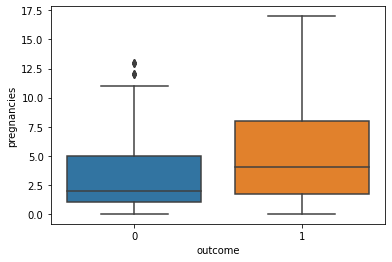

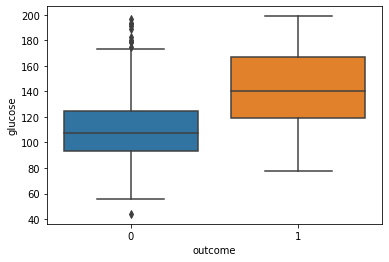

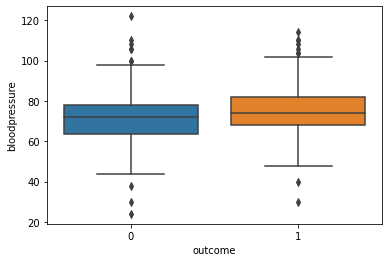

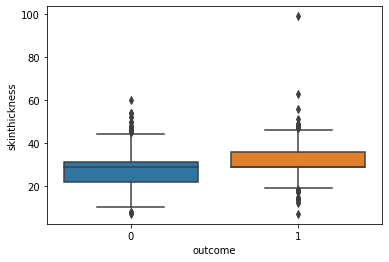

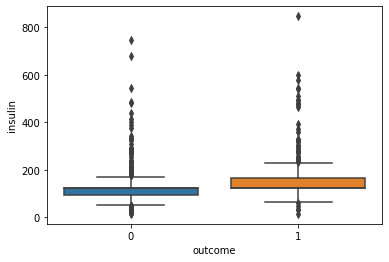

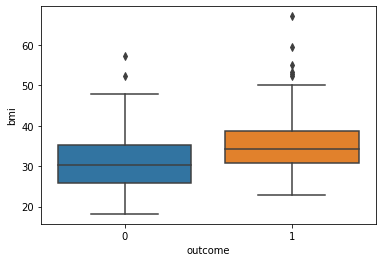

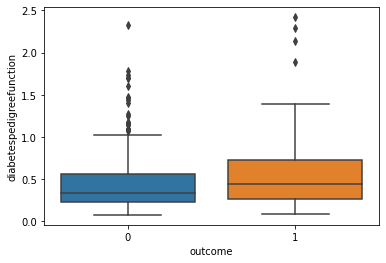

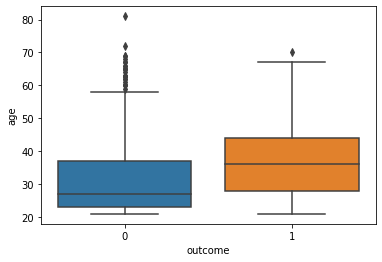

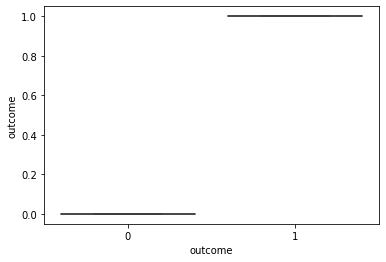

In [9]:
for i in df.columns:
    plt.figure()
    sns.boxplot(data=df, x='outcome', y=i) #Looks like the boxplots indicated some outliers. Perhaps one could consider a replacement strategy, 
    #but for now I'll keep things simple and keep them.

<AxesSubplot:>

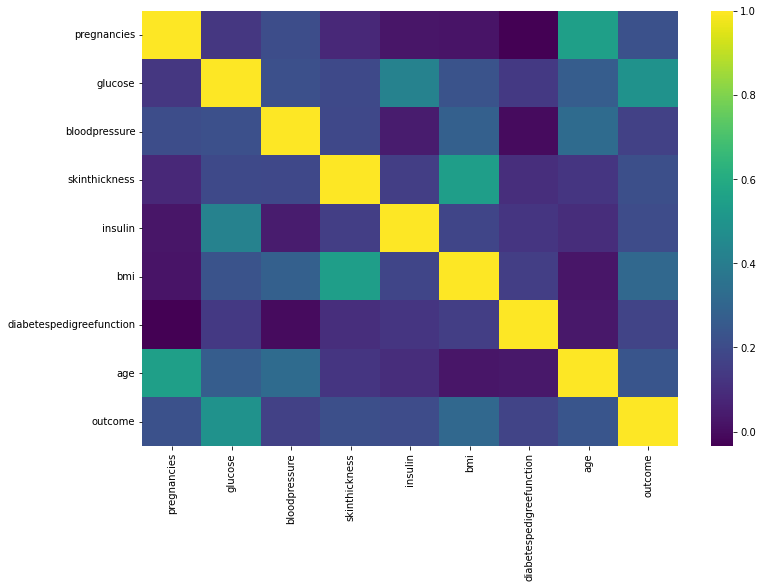

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='viridis') #Some expected correlations are here, such as pregnancies with age, glucose with outcome (having diabetes = 1 in outcome), etc.

In [11]:
pd.pivot_table(df, index=['outcome'],  values = df.columns, aggfunc = np.mean)
# Looks like all of the features are higher for diabetecs, as well as more varied (from the next graph)

,age,bloodpressure,bmi,diabetespedigreefunction,glucose,insulin,pregnancies,skinthickness
outcome,,,,,,,,
0,31.190000,70.920000,30.885600,0.429734,110.682000,127.792000,3.298000,27.726000
1,37.067164,75.123134,35.383582,0.550500,142.130597,164.701493,4.865672,31.686567


In [12]:
pd.pivot_table(df, index=['outcome'],  values = df.columns, aggfunc = np.std)

,age,bloodpressure,bmi,diabetespedigreefunction,glucose,insulin,pregnancies,skinthickness
outcome,,,,,,,,
0,11.667655,11.929385,6.504128,0.299085,24.707201,74.447469,3.017185,8.552966
1,10.968254,11.951672,6.595603,0.372354,29.568839,100.932249,3.741239,8.662994


/home/jcummings/.local/lib/python3.6/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


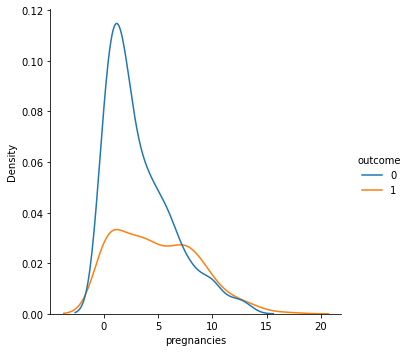

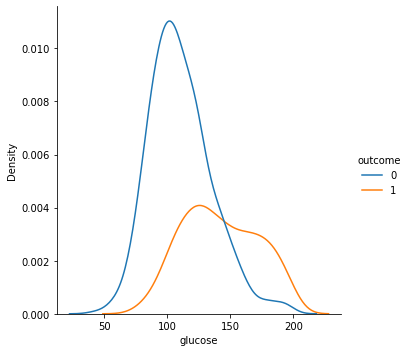

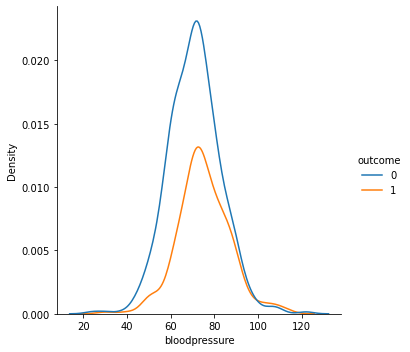

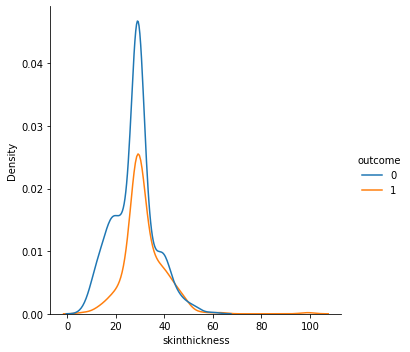

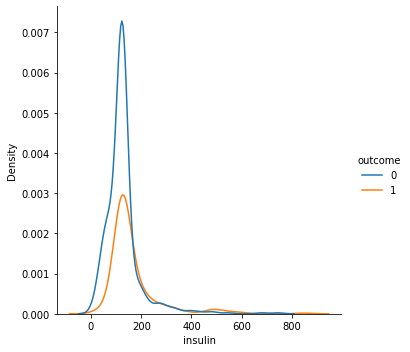

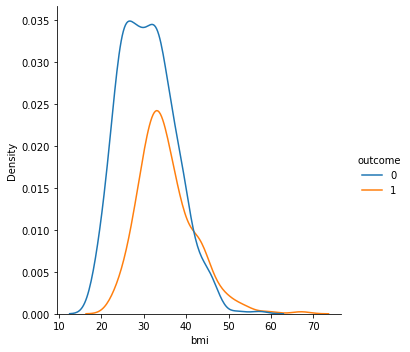

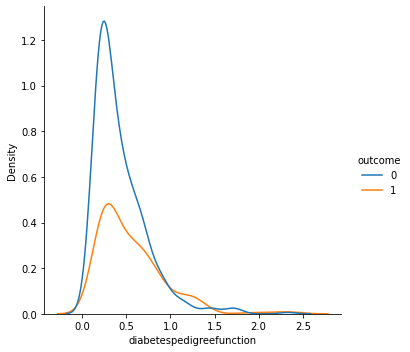

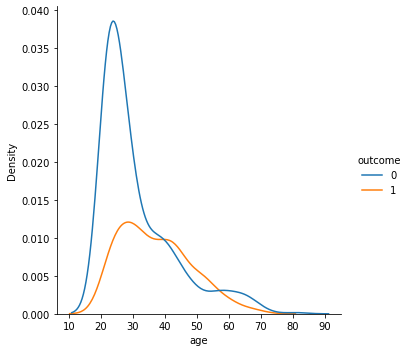

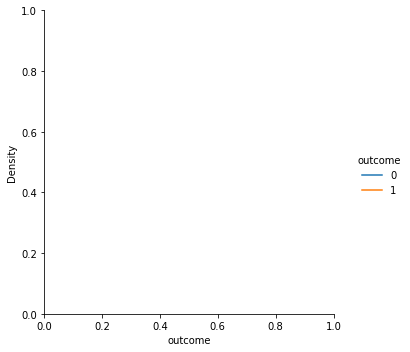

In [13]:
for i in df.columns:
    sns.displot(data=df,x=i,hue='outcome',kind='kde') 
# It is looking like I'll want to keep all these features, except perhaps skin thickness.
# Data seems generally right-skewed for diabetes (outcome) variable

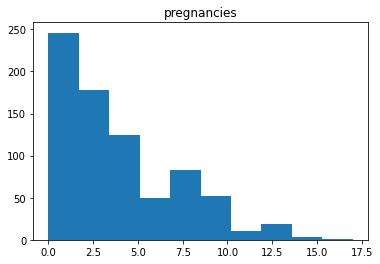

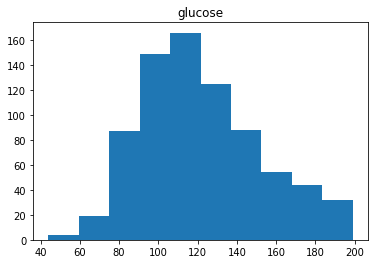

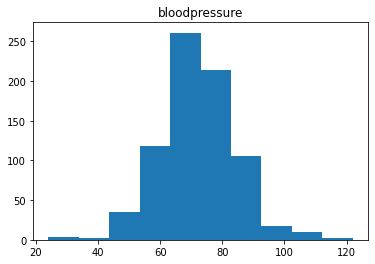

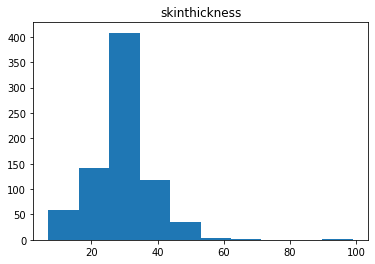

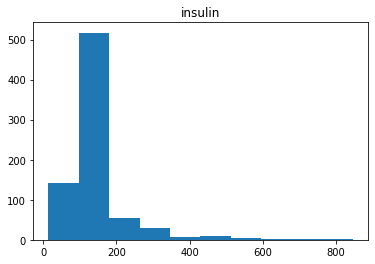

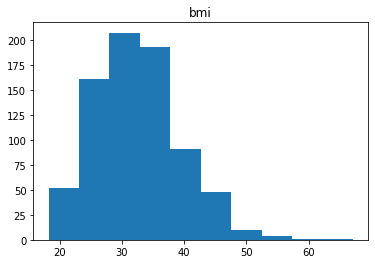

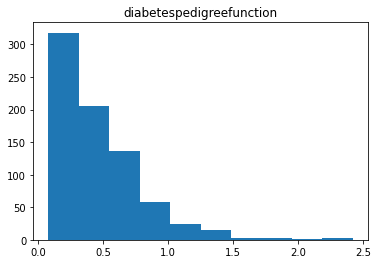

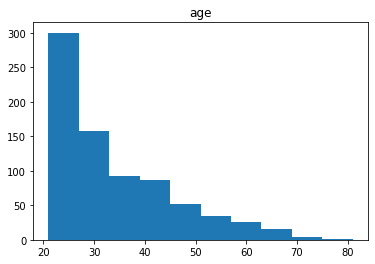

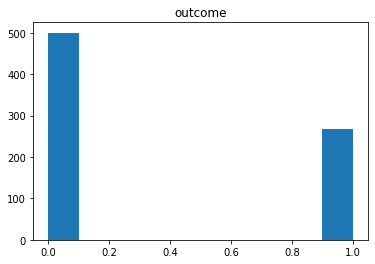

In [14]:
%matplotlib inline
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()
# The diabetes pedigree fucntions and age could be logged to make them more normal

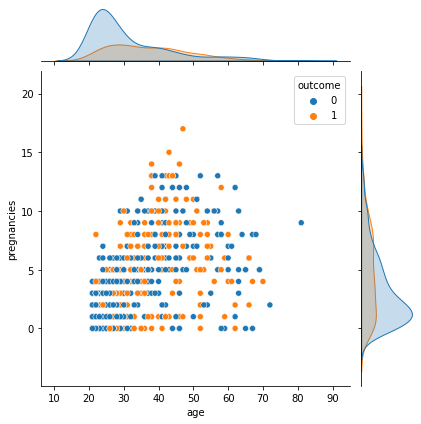

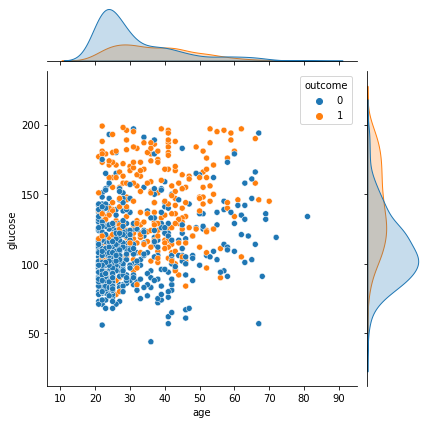

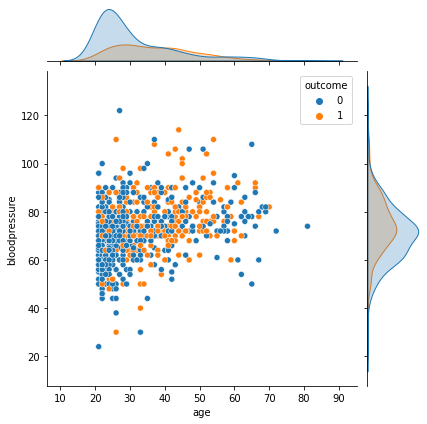

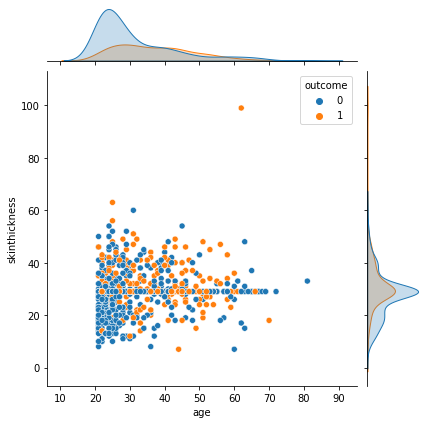

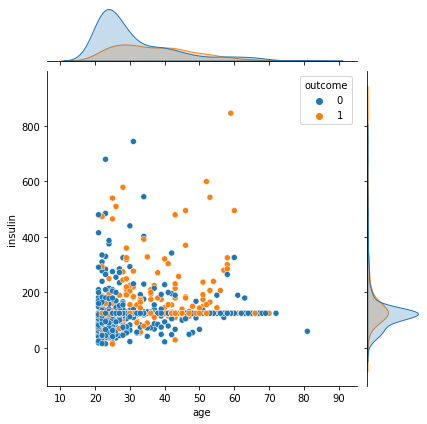

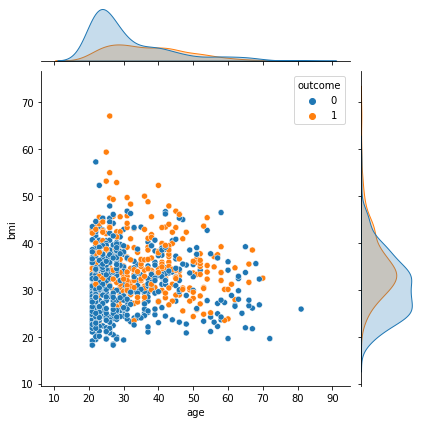

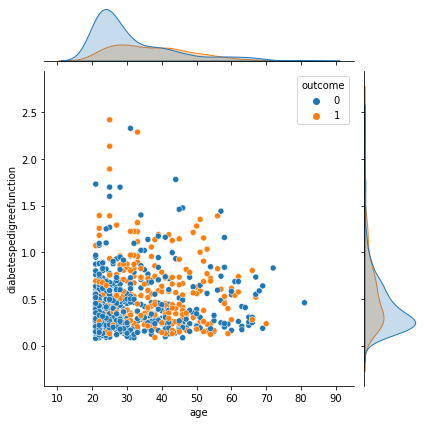

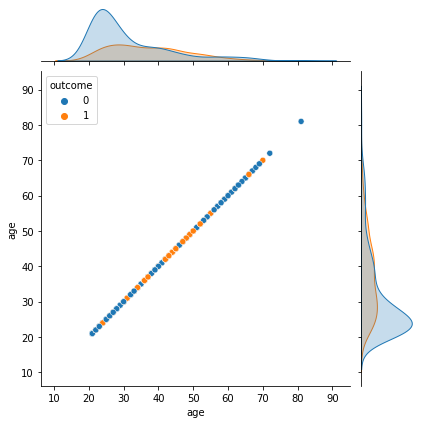

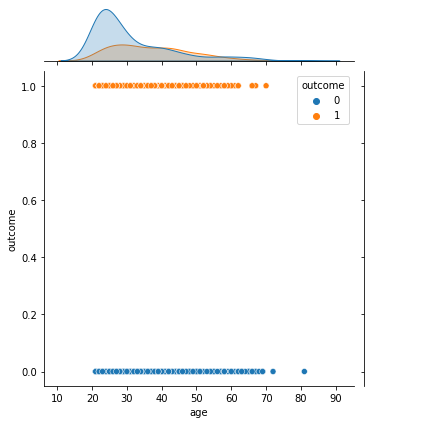

In [15]:
# Based on these plots of features and age, it seems like some features (bmi, glucose, bloodpressure) 
# are more important for older people. I could try one-hot encoding age to try and capture this behavior.
for i in df.columns:
    sns.jointplot(data = df, x = 'age', y = i, hue='outcome')

# 2. Model Building Idea, Functions for Model Building, Functions for Visualization
My goal is to create a model with 80% recall on identifying Diabetes. I'll be hyperparameter tuning
with gridsearchcv. Normally models will then predict 1 if P(diab>.5),  0 if P(diab<.5). Instead of 
using .5, I'll search for the maximum threshold thresh such that P(diab>thresh) yields a recall of 80%.

This section starts out with some functions. summary_of_model provides information on the tuned model
including confusion matricies and precision-recall curves.

The following Models are conidered, with the Gradient Boosting and the Random Forest looking the most promising.

* Dummy classifier (for comparison)
* Gradient Boosting Classifier
* Logistic Regression
* Support Vector Machine
* Random Forest
* K Nearest Neighbors
* Decision Tree Classifier

In [17]:
from sklearn.model_selection import train_test_split
y=df_scaled.pop('outcome')

## Parameters and useful functions for analysis

In [18]:
from random import randrange
TEST_FRACTION = .25 #percentage of the test size
CV = 7 #cross validations to do in grid search
OPT_ON = 'f1' #what to optimize in gridsearches
N_JOBS = 5 #number of cores
RAND_STATE = randrange(1000) #will be doing multiple train-test-splits, and want to keep everything random, but do the same train-test-splits
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=TEST_FRACTION, random_state = RAND_STATE)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
def summary_of_model(clf, X_train, X_test, y_train, y_test, threshold):
    # This provides a summary of the model given a certain decision threshold of the predicted probability.
    # It includes a summary on recall/accuracy on the training and test sets, a visual display of the confusion matrix
    # and a plot of the precision-recall curve for a given classifier.
    pred_proba_test = clf.predict_proba(X_test)
    pred_test = (pred_proba_test [:,1] >= threshold).astype('int')
    pred_proba_train = clf.predict_proba(X_train)
    pred_train = (pred_proba_train [:,1] >= threshold).astype('int')
    print(classification_report(y_test, pred_test))
    print('Recall of diabetes on the training set: {:.2f}'.format(recall_score(y_train, pred_train)))
    print('Accuracy on the training set: {:.2f}'.format(accuracy_score(y_train, pred_train)))
    print('Recall of diabetes class on the test set: {:.2f}'.format(recall_score(y_test, pred_test)))
    print('Accuracy on the test set: {:.2f}'.format(accuracy_score(y_test, pred_test)))
    print(confusion_matrix(y_test, pred_test))
    _, ax = plt.subplots(figsize=(9,9))
    ax = sns.heatmap(confusion_matrix(y_test, pred_test), annot=True, fmt='d', cmap='vlag', annot_kws={"size": 40, "weight": "bold"})  
    labels = ['False', 'True']
    ax.set_xticklabels(labels, fontsize=25);
    ax.set_yticklabels(labels, fontsize=25);
    ax.set_ylabel('Actual', fontsize=30);
    ax.set_xlabel('Prediction', fontsize=30)
    lr_probs = clf.predict_proba(X_test)
    lr_probs = lr_probs[:, 1]
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
    plt.figure()
    plt.plot(lr_recall, lr_precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

In [20]:
from sklearn.metrics import make_scorer
def recall_calc(y_true, y_pred):
    # A calculator for the recall of diabetes. There is a built-in function for this, but I wanted to verify the built-in.
    y_true = y_true.values
    #y_pred = y_pred.values
    true_positives = np.array([1 if (y_true[i]==1 and y_pred[i]==1) else 0 for i in np.arange(0,len(y_true))])
    false_negatives = np.array([1 if (y_true[i]==1 and y_pred[i]==0) else 0 for i in np.arange(0,len(y_true))])
    recall = true_positives.sum()/(true_positives.sum() + false_negatives.sum())
    return recall

In [21]:
def find_threshold(clf, y_test, X_test):
    # A function that finds the highest (up to descritization) probability threshold (or decision boundary) that has a recall 
    # of req_recall. 
    req_recall = .8
    threshold = .5
    pred_proba_test = clf.predict_proba(X_test)
    pred_test = (pred_proba_test [:,1] >= threshold).astype('int')
    search_step = 1e-2 # the amount to decrease the probabilty threshold if the recall is not > .8
    current_recall = recall_calc(y_test, pred_test)
    while(current_recall < req_recall):
        threshold = threshold - search_step
        pred_proba_test = clf.predict_proba(X_test)
        pred_test = (pred_proba_test [:,1] >= threshold).astype('int')
        current_recall = recall_calc(y_test, pred_test)
    return threshold

# 3. Feature and Model Experimentation

* I scale all numerical data and run several classifiers. 
* I one-hot encode on age and run a Gradient Boosted Classifier, the idea being that this works best in what is done in the previous bullet.
* I one-hot encode on age and BMI with a Gradient Boosted Classifier
* I one-hot encode on BMI and test Gradient Boosted Classifiers.

## Feature Setup, Scale Data

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler #scaling the parameters
ss = StandardScaler()
cols_to_scale = ['pregnancies', 'age', 'bmi', 'diabetespedigreefunction', 'bloodpressure', 'insulin', 'glucose']# cols not included: 'age', 'pregnancies', 'glucose', 'bloodpressure', 'insulin', 'bmi', 'diabetespedigreefunction',  'bloodpressure','skinthickness'
cols_not_scaled = ['outcome']
#pd.pivot_table(df, index=['outcome'],  values = df.columns, aggfunc = np.mean)
df_scaled = pd.DataFrame(ss.fit_transform(df[cols_to_scale]), index=df.index, columns=cols_to_scale)
df_scaled[cols_not_scaled] = df[cols_not_scaled]
pd.pivot_table(df_scaled, index=['outcome'],  values = df_scaled.columns, aggfunc = np.mean)

## Tests Using All Variables as Numerical

### Dummy Classifier

In [22]:
#Let's get a dummy classifier to test our results against first.
import numpy as np
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       124
           1       0.33      0.32      0.33        68

    accuracy                           0.53       192
   macro avg       0.48      0.48      0.48       192
weighted avg       0.53      0.53      0.53       192

Recall of diabetes on the training set: 0.33
Accuracy on the training set: 0.54
Recall of diabetes class on the test set: 0.32
Accuracy on the test set: 0.53
[[80 44]
 [46 22]]


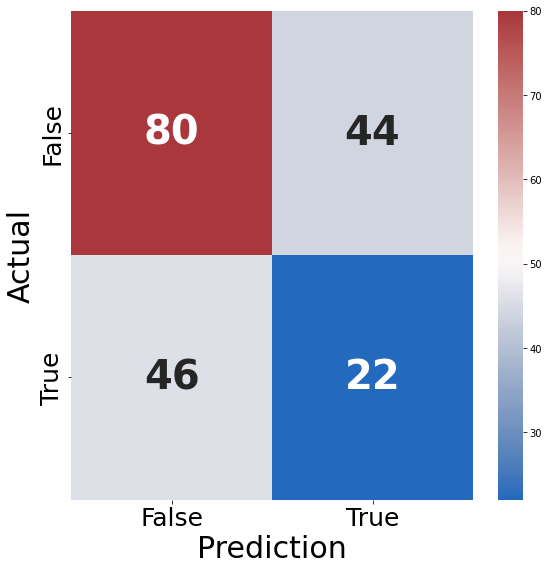

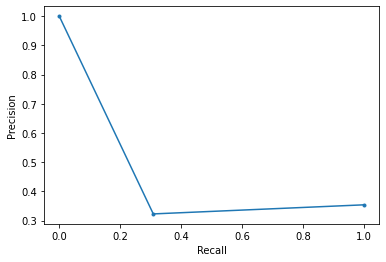

In [23]:
summary_of_model(dummy_clf, X_train, X_test, y_train, y_test, .5)

### Gradient Boosted Classifier

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
grid_values_boost = {'n_estimators': [500, 525, 550, 575, 600, 625, 650, 675, 700],
                     'learning_rate': [5e-3, 6e-3, 7e-3, 8e-3, 9e-3, 1e-2,], 
                     'max_depth': [2, 3]}
clf_boost = GradientBoostingClassifier()
grid_clf_boost = GridSearchCV(clf_boost, param_grid=grid_values_boost, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS, verbose=2)
grid_clf_boost.fit(X_train, y_train)

Fitting 7 folds for each of 108 candidates, totalling 756 fits


GridSearchCV(cv=7, estimator=GradientBoostingClassifier(), n_jobs=5,
             param_grid={'learning_rate': [0.005, 0.006, 0.007, 0.008, 0.009,
                                           0.01],
                         'max_depth': [2, 3],
                         'n_estimators': [500, 525, 550, 575, 600, 625, 650,
                                          675, 700]},
             scoring='f1', verbose=2)

In [104]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_boost.best_params_, grid_clf_boost.best_score_))

Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 675}, 
 Best score: 0.6363024786941524


In [105]:
thresh = find_threshold(grid_clf_boost, y_test, X_test)
print(thresh)

0.3999999999999999


              precision    recall  f1-score   support

           0       0.88      0.75      0.81       124
           1       0.64      0.81      0.71        68

    accuracy                           0.77       192
   macro avg       0.76      0.78      0.76       192
weighted avg       0.79      0.77      0.78       192

Recall of diabetes on the training set: 0.88
Accuracy on the training set: 0.89
Recall of diabetes class on the test set: 0.81
Accuracy on the test set: 0.77
[[93 31]
 [13 55]]


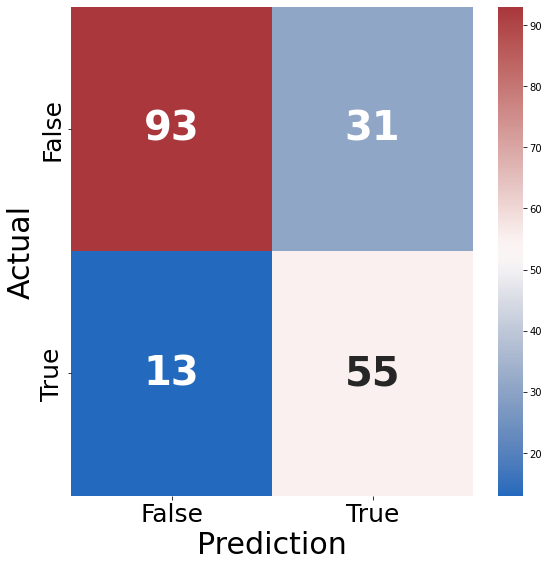

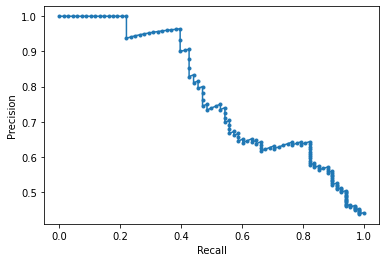

In [106]:
summary_of_model(grid_clf_boost, X_train, X_test, y_train, y_test, thresh)

It may be concerning that the number of true negatives is comparable to the dummy classifier, but we're okay with that! We have significantly 
increased our recall on diabetes, and our accuracy is still good. But, as a reality check, let's set the threshold to .5 instead of adjusting it
to improve recall.

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       124
           1       0.64      0.60      0.62        68

    accuracy                           0.74       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192

Recall of diabetes on the training set: 0.70
Accuracy on the training set: 0.85
Recall of diabetes class on the test set: 0.60
Accuracy on the test set: 0.74
[[101  23]
 [ 27  41]]


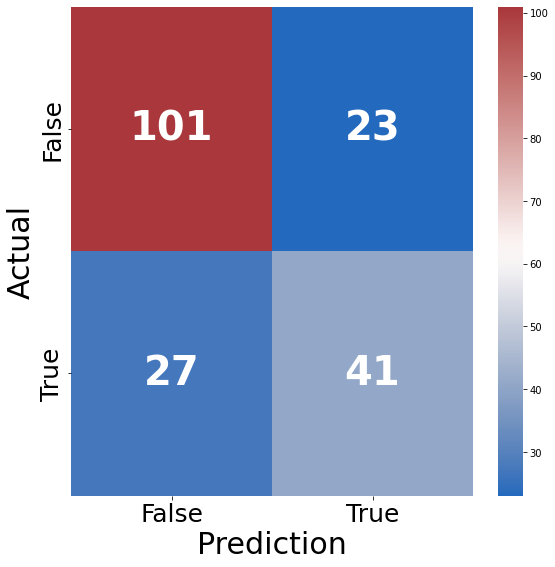

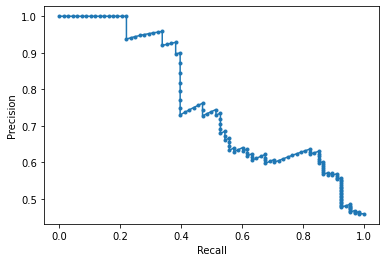

In [28]:
summary_of_model(grid_clf_boost, X_train, X_test, y_train, y_test, .5)

### Logistic Regression Classifier

In [29]:
from sklearn.linear_model import LogisticRegression
grid_values_log = {'penalty': ['l1','l2'], 'C': np.logspace(-1, 4, 200), 'solver': ['liblinear']}
clf_log = LogisticRegression()
grid_clf_log = GridSearchCV(clf_log, param_grid=grid_values_log, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS)
grid_clf_log.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(), n_jobs=5,
             param_grid={'C': array([1.00000000e-01, 1.05956018e-01, 1.12266777e-01, 1.18953407e-01,
       1.26038293e-01, 1.33545156e-01, 1.41499130e-01, 1.49926843e-01,
       1.58856513e-01, 1.68318035e-01, 1.78343088e-01, 1.88965234e-01,
       2.00220037e-01, 2.12145178e-01, 2.24780583e-01, 2.38168555e-01,
       2.52353917e-01, 2.67384162e-01...
       3.33129479e+03, 3.52970730e+03, 3.73993730e+03, 3.96268864e+03,
       4.19870708e+03, 4.44878283e+03, 4.71375313e+03, 4.99450512e+03,
       5.29197874e+03, 5.60716994e+03, 5.94113398e+03, 6.29498899e+03,
       6.66991966e+03, 7.06718127e+03, 7.48810386e+03, 7.93409667e+03,
       8.40665289e+03, 8.90735464e+03, 9.43787828e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1')

In [30]:
print('Best Params: {}, \n Best score: {:.2f}'.format(grid_clf_log.best_params_, grid_clf_log.best_score_))

Best Params: {'C': 0.12603829296797275, 'penalty': 'l1', 'solver': 'liblinear'}, 
 Best score: 0.62


In [31]:
thresh = find_threshold(grid_clf_log, y_test, X_test)
print(thresh)

0.3599999999999999


              precision    recall  f1-score   support

           0       0.89      0.70      0.78       124
           1       0.61      0.84      0.70        68

    accuracy                           0.75       192
   macro avg       0.75      0.77      0.74       192
weighted avg       0.79      0.75      0.76       192

Recall of diabetes on the training set: 0.72
Accuracy on the training set: 0.76
Recall of diabetes class on the test set: 0.84
Accuracy on the test set: 0.75
[[87 37]
 [11 57]]


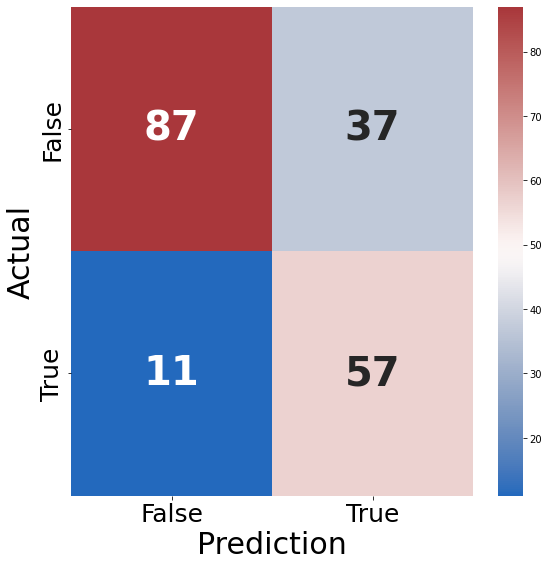

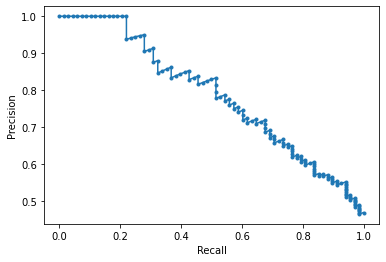

In [32]:
summary_of_model(grid_clf_log, X_train, X_test, y_train, y_test, thresh)

### Support Vector Machine Classifier

In [33]:
from sklearn.svm import SVC
svc_param_grid = {'C': [1e-1, 1, 10],
                  'gamma': [10, 1, 1e-1],
                  'kernel': ['rbf'],
                  'probability': [True]} # , , 'sigmoid' 
clf_svc = SVC()
grid_clf_svc = GridSearchCV(clf_svc, svc_param_grid, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS, verbose=2)
grid_clf_svc.fit(X_train, y_train)

Fitting 7 folds for each of 9 candidates, totalling 63 fits


GridSearchCV(cv=7, estimator=SVC(), n_jobs=5,
             param_grid={'C': [0.1, 1, 10], 'gamma': [10, 1, 0.1],
                         'kernel': ['rbf'], 'probability': [True]},
             scoring='f1', verbose=2)

In [34]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_svc.best_params_, grid_clf_svc.best_score_))

Best Params: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}, 
 Best score: 0.5924195529353967


In [35]:
thresh = find_threshold(grid_clf_svc, y_test, X_test)
print(thresh)

0.33999999999999986


              precision    recall  f1-score   support

           0       0.88      0.73      0.80       124
           1       0.62      0.82      0.71        68

    accuracy                           0.76       192
   macro avg       0.75      0.77      0.75       192
weighted avg       0.79      0.76      0.77       192

Recall of diabetes on the training set: 0.77
Accuracy on the training set: 0.80
Recall of diabetes class on the test set: 0.82
Accuracy on the test set: 0.76
[[90 34]
 [12 56]]


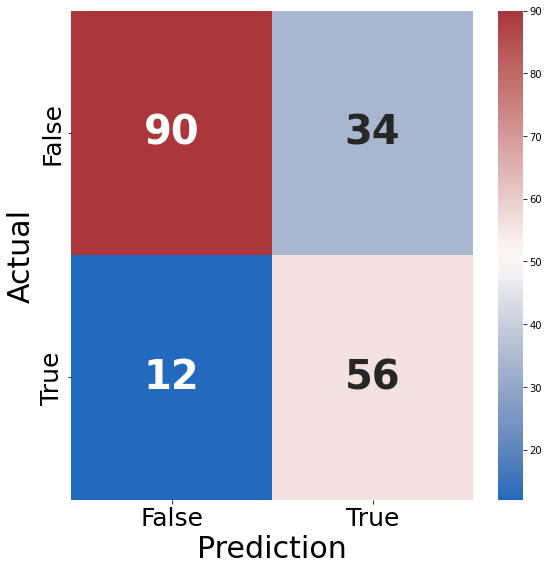

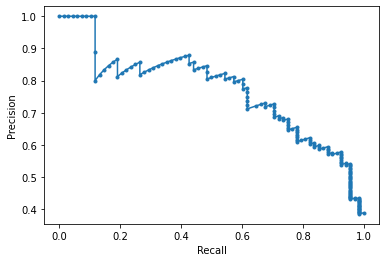

In [36]:
summary_of_model(grid_clf_svc, X_train, X_test, y_train, y_test, thresh)

### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
forest_param_grid = {'n_estimators': np.arange(50, 100, 200), 
                     'max_depth': [2, 3, 4], 
                     'max_features': ['auto', 'sqrt', 'log2', None]}
clf_forest = RandomForestClassifier()
grid_clf_forest = GridSearchCV(clf_forest, forest_param_grid, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS)
grid_clf_forest.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': array([50])},
             scoring='f1')

In [38]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_forest.best_params_, grid_clf_forest.best_score_))

Best Params: {'max_depth': 4, 'max_features': None, 'n_estimators': 50}, 
 Best score: 0.6233209119390961


In [39]:
thresh = find_threshold(grid_clf_forest, y_test, X_test)
print(thresh)

0.3599999999999999


              precision    recall  f1-score   support

           0       0.89      0.69      0.78       124
           1       0.60      0.84      0.70        68

    accuracy                           0.74       192
   macro avg       0.74      0.77      0.74       192
weighted avg       0.79      0.74      0.75       192

Recall of diabetes on the training set: 0.84
Accuracy on the training set: 0.84
Recall of diabetes class on the test set: 0.84
Accuracy on the test set: 0.74
[[86 38]
 [11 57]]


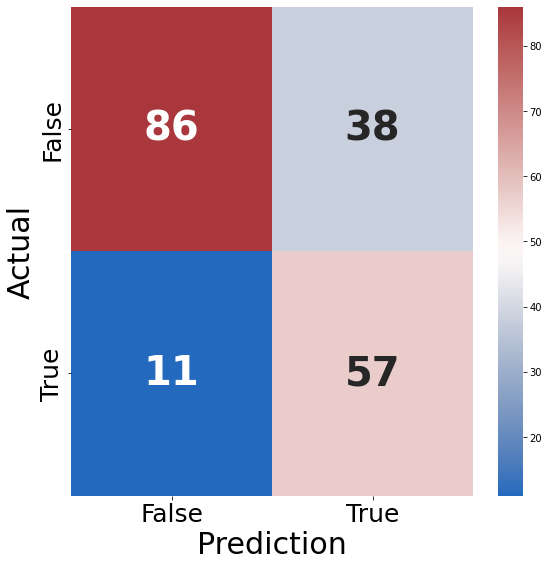

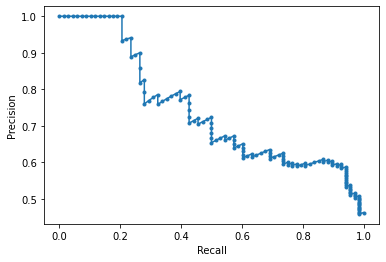

In [40]:
summary_of_model(grid_clf_forest, X_train, X_test, y_train, y_test, thresh)

### KNN Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [2, 3, 4]}
grid_clf_knn = GridSearchCV(clf_knn, knn_param_grid, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS,)
grid_clf_knn.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'n_neighbors': [2, 3, 4]}, scoring='f1')

In [42]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_knn.best_params_, grid_clf_knn.best_score_))

Best Params: {'n_neighbors': 3}, 
 Best score: 0.5962986009698182


In [43]:
thresh = find_threshold(grid_clf_knn, y_test, X_test)
print(thresh)

0.32999999999999985


              precision    recall  f1-score   support

           0       0.91      0.51      0.65       124
           1       0.50      0.91      0.65        68

    accuracy                           0.65       192
   macro avg       0.71      0.71      0.65       192
weighted avg       0.77      0.65      0.65       192

Recall of diabetes on the training set: 1.00
Accuracy on the training set: 0.74
Recall of diabetes class on the test set: 0.91
Accuracy on the test set: 0.65
[[63 61]
 [ 6 62]]


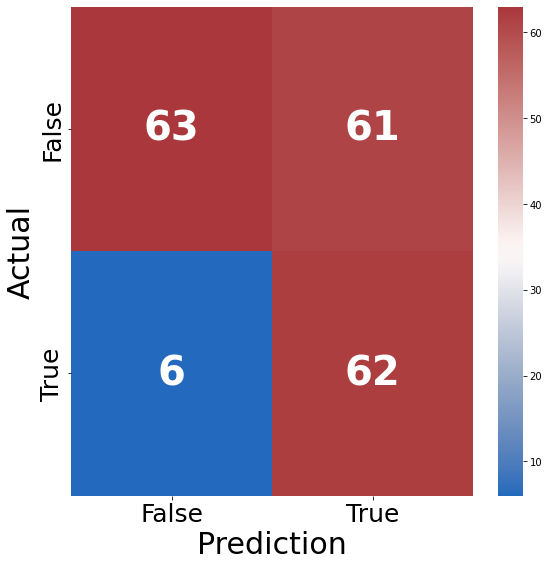

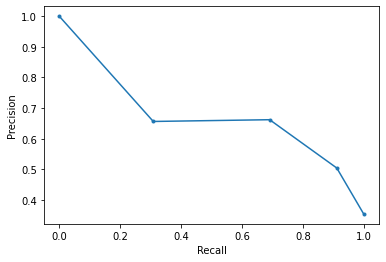

In [44]:
summary_of_model(grid_clf_knn, X_train, X_test, y_train, y_test, thresh)

### Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
tree_param_grid = {'max_depth': np.arange(1, 4), 'max_features': ['auto', 'sqrt', 'log2'] }
grid_clf_tree = GridSearchCV(clf_tree, tree_param_grid, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS)
grid_clf_tree.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(), n_jobs=5,
             param_grid={'max_depth': array([1, 2, 3]),
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='f1')

In [46]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_tree.best_params_, grid_clf_tree.best_score_))

Best Params: {'max_depth': 3, 'max_features': 'sqrt'}, 
 Best score: 0.6376336492058693


In [47]:
thresh = find_threshold(grid_clf_tree, y_test, X_test)
print(thresh)

0.33999999999999986


              precision    recall  f1-score   support

           0       0.85      0.58      0.69       124
           1       0.51      0.81      0.63        68

    accuracy                           0.66       192
   macro avg       0.68      0.69      0.66       192
weighted avg       0.73      0.66      0.67       192

Recall of diabetes on the training set: 0.84
Accuracy on the training set: 0.70
Recall of diabetes class on the test set: 0.81
Accuracy on the test set: 0.66
[[72 52]
 [13 55]]


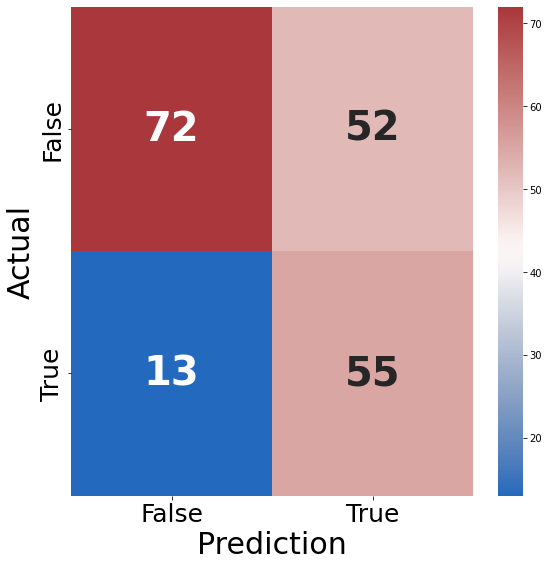

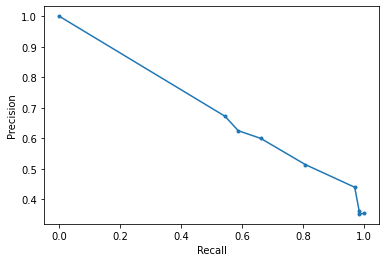

In [48]:
summary_of_model(grid_clf_tree, X_train, X_test, y_train, y_test, thresh)

## Tests One-hot encoding on the age

### Feature Setup, Scale Data, One-Hot Encode the Age

In [49]:
df_cat = df
df['age_cat'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 60, float('Inf')], labels=['very young', 'young', 'mid_young', 'mid', 'old'])
df_bmi_cat = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, float('Inf')], labels=['healthy', 'overweight', 'obese', 'very_obese'])
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,age_cat
0,6,148,72,35,125,33.6,0.627,50,1,mid
1,1,85,66,29,125,26.6,0.351,31,0,young
2,8,183,64,29,125,23.3,0.672,32,1,young
3,1,89,66,23,94,28.1,0.167,21,0,very young
4,0,137,40,35,168,43.1,2.288,33,1,young


In [50]:
cols_num = ['pregnancies', 'glucose', 'bloodpressure', 'insulin', 'bmi', 'diabetespedigreefunction'] #not including skin thickness, age (since age now categorical)
df_num = df[cols_num]
cols_cat = ['age_cat', 'outcome']
df_cat = df[cols_cat]

In [51]:
ss = StandardScaler()
#pd.pivot_table(df, index=['outcome'],  values = df.columns, aggfunc = np.mean)
df_num_scaled = pd.DataFrame(ss.fit_transform(df_num), index=df_num.index, columns=df_num.columns)
df_num_scaled.head()

,pregnancies,glucose,bloodpressure,insulin,bmi,diabetespedigreefunction
0,0.639947,0.866045,-0.031990,-0.181541,0.166619,0.468492
1,-0.844885,-1.205066,-0.528319,-0.181541,-0.852200,-0.365061
2,1.233880,2.016662,-0.693761,-0.181541,-1.332500,0.604397
3,-0.844885,-1.073567,-0.528319,-0.540642,-0.633881,-0.920763
4,-1.141852,0.504422,-2.679076,0.316566,1.549303,5.484909


In [52]:
ycat1 = df_cat.pop('outcome')

In [53]:
df_cat.head()

,age_cat
0,mid
1,young
2,young
3,very young
4,young


In [54]:
df_cat_encoded = pd.get_dummies(df_cat)
df_cat_encoded.head()

,age_cat_very young,age_cat_young,age_cat_mid_young,age_cat_mid,age_cat_old
0,0,0,0,1,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [55]:
df_rejoined = pd.concat([df_num_scaled, df_cat_encoded], axis=1)
df_rejoined.head()

,pregnancies,glucose,bloodpressure,insulin,bmi,diabetespedigreefunction,age_cat_very young,age_cat_young,age_cat_mid_young,age_cat_mid,age_cat_old
0,0.639947,0.866045,-0.031990,-0.181541,0.166619,0.468492,0,0,0,1,0
1,-0.844885,-1.205066,-0.528319,-0.181541,-0.852200,-0.365061,0,1,0,0,0
2,1.233880,2.016662,-0.693761,-0.181541,-1.332500,0.604397,0,1,0,0,0
3,-0.844885,-1.073567,-0.528319,-0.540642,-0.633881,-0.920763,1,0,0,0,0
4,-1.141852,0.504422,-2.679076,0.316566,1.549303,5.484909,0,1,0,0,0


In [56]:
Xcat1_train, Xcat1_test, ycat1_train, ycat1_test = train_test_split(df_rejoined, ycat1, test_size=TEST_FRACTION, random_state = RAND_STATE)

### Gradient Boosted Classifier, One-hot Encoding on the Age

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
clf_boost_cat1 = GradientBoostingClassifier()
grid_clf_boost_cat1 = GridSearchCV(clf_boost_cat1, param_grid=grid_values_boost, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS, verbose=2)
#note: using the parameters from previous gridsearch on gradient boosting classifier
grid_clf_boost_cat1.fit(Xcat1_train, ycat1_train)

Fitting 7 folds for each of 180 candidates, totalling 1260 fits


GridSearchCV(cv=7, estimator=GradientBoostingClassifier(), n_jobs=5,
             param_grid={'learning_rate': [0.005, 0.006, 0.007, 0.008, 0.009,
                                           0.01],
                         'max_depth': [2, 3],
                         'n_estimators': [50, 75, 100, 125, 150, 175, 200, 225,
                                          250, 275, 300, 325, 350, 375, 400]},
             scoring='f1', verbose=2)

In [58]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_boost_cat1.best_params_, grid_clf_boost_cat1.best_score_))

Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}, 
 Best score: 0.6155885773112663


In [59]:
thresh = find_threshold(grid_clf_boost_cat1, ycat1_test, Xcat1_test)
print(thresh)

0.3599999999999999


              precision    recall  f1-score   support

           0       0.87      0.68      0.76       124
           1       0.58      0.81      0.67        68

    accuracy                           0.72       192
   macro avg       0.72      0.74      0.72       192
weighted avg       0.76      0.72      0.73       192

Recall of diabetes on the training set: 0.86
Accuracy on the training set: 0.83
Recall of diabetes class on the test set: 0.81
Accuracy on the test set: 0.72
[[84 40]
 [13 55]]


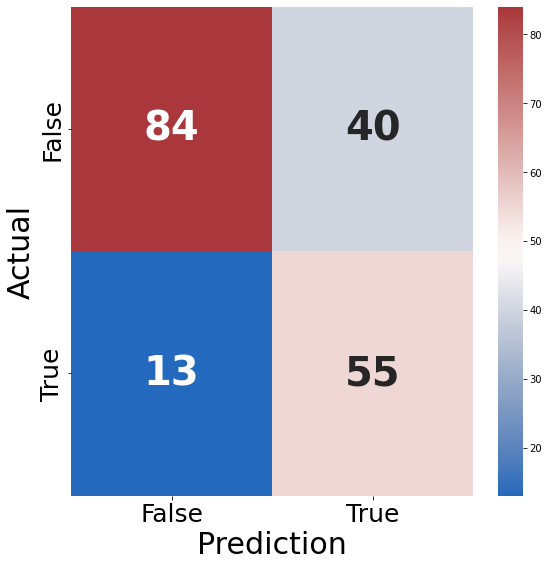

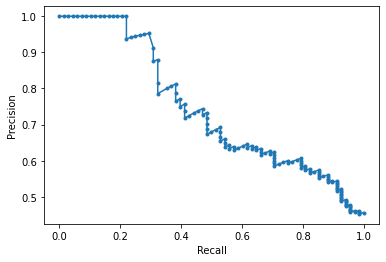

In [60]:
summary_of_model(grid_clf_boost_cat1, Xcat1_train, Xcat1_test, ycat1_train, ycat1_test, thresh) #Summary for lowering the threshold to achieve necessary recall on diabetes

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       124
           1       0.64      0.57      0.60        68

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192

Recall of diabetes on the training set: 0.67
Accuracy on the training set: 0.83
Recall of diabetes class on the test set: 0.57
Accuracy on the test set: 0.73
[[102  22]
 [ 29  39]]


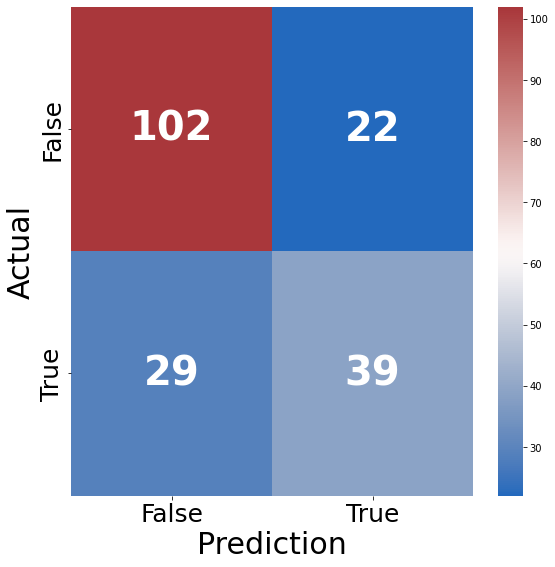

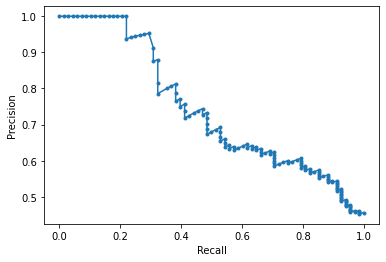

In [61]:
summary_of_model(grid_clf_boost_cat1, Xcat1_train, Xcat1_test, ycat1_train, ycat1_test, .5) #Summary using a threshold of .5

### Random Forest Classifier, One-hot Encoding on the Age

In [62]:
from sklearn.ensemble import RandomForestClassifier
clf_forest_cat1 = RandomForestClassifier()
grid_clf_forest_cat1 = GridSearchCV(clf_forest_cat1, forest_param_grid, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS)
# note: using previous parameter search parameters
grid_clf_forest_cat1.fit(Xcat1_train, ycat1_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': array([50])},
             scoring='f1')

In [63]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_forest_cat1.best_params_, grid_clf_forest_cat1.best_score_))

Best Params: {'max_depth': 4, 'max_features': None, 'n_estimators': 50}, 
 Best score: 0.624123823996641


In [64]:
thresh = find_threshold(grid_clf_forest_cat1, ycat1_test, Xcat1_test)
print(thresh)

0.32999999999999985


              precision    recall  f1-score   support

           0       0.86      0.67      0.75       124
           1       0.57      0.81      0.67        68

    accuracy                           0.72       192
   macro avg       0.72      0.74      0.71       192
weighted avg       0.76      0.72      0.72       192

Recall of diabetes on the training set: 0.86
Accuracy on the training set: 0.82
Recall of diabetes class on the test set: 0.81
Accuracy on the test set: 0.72
[[83 41]
 [13 55]]


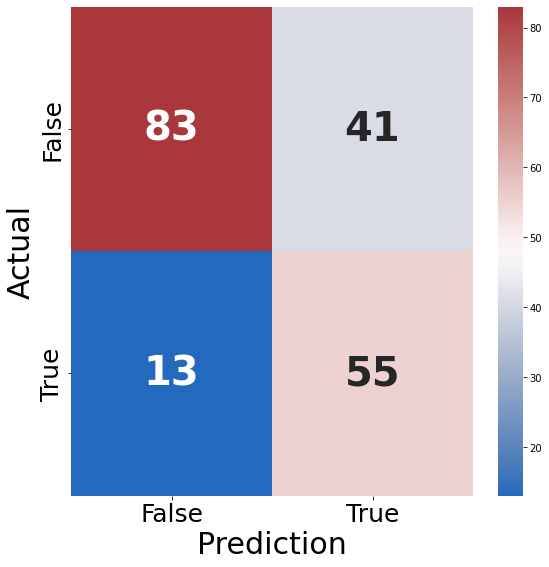

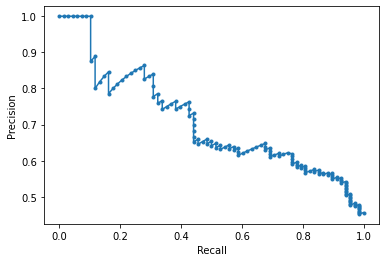

In [65]:
summary_of_model(grid_clf_forest_cat1, Xcat1_train, Xcat1_test, ycat1_train, ycat1_test, thresh)

## Tests One-hot encoding on age and BMI

### Feature Setup, Scale Data, One-Hot Encode the Age and BMI

In [66]:
df_cat = df
df['age_cat'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 60, float('Inf')], labels=['very young', 'young', 'mid_young', 'mid', 'old'])
df['bmi_cat'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, float('Inf')], labels=['healthy', 'overweight', 'obese', 'very_obese'])
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,age_cat,bmi_cat
0,6,148,72,35,125,33.6,0.627,50,1,mid,very_obese
1,1,85,66,29,125,26.6,0.351,31,0,young,obese
2,8,183,64,29,125,23.3,0.672,32,1,young,overweight
3,1,89,66,23,94,28.1,0.167,21,0,very young,obese
4,0,137,40,35,168,43.1,2.288,33,1,young,very_obese


In [67]:
cols_num = ['pregnancies', 'glucose', 'bloodpressure', 'insulin', 'diabetespedigreefunction'] #not including skin thickness, age, bmi (since age, bmi now categorical)
df_num = df[cols_num]
cols_cat = ['age_cat', 'bmi_cat', 'outcome']
df_cat = df[cols_cat]

In [68]:
ss = StandardScaler()
#pd.pivot_table(df, index=['outcome'],  values = df.columns, aggfunc = np.mean)
df_num_scaled = pd.DataFrame(ss.fit_transform(df_num), index=df_num.index, columns=df_num.columns)
df_num_scaled.head()

,pregnancies,glucose,bloodpressure,insulin,diabetespedigreefunction
0,0.639947,0.866045,-0.031990,-0.181541,0.468492
1,-0.844885,-1.205066,-0.528319,-0.181541,-0.365061
2,1.233880,2.016662,-0.693761,-0.181541,0.604397
3,-0.844885,-1.073567,-0.528319,-0.540642,-0.920763
4,-1.141852,0.504422,-2.679076,0.316566,5.484909


In [69]:
ycat2 = df_cat.pop('outcome')

In [70]:
df_cat_encoded = pd.get_dummies(df_cat)
df_cat_encoded.head()

,age_cat_very young,age_cat_young,age_cat_mid_young,age_cat_mid,age_cat_old,bmi_cat_healthy,bmi_cat_overweight,bmi_cat_obese,bmi_cat_very_obese
0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,1


In [71]:
df_rejoined = pd.concat([df_num_scaled, df_cat_encoded], axis=1)
df_rejoined.head()

,pregnancies,glucose,bloodpressure,insulin,diabetespedigreefunction,age_cat_very young,age_cat_young,age_cat_mid_young,age_cat_mid,age_cat_old,bmi_cat_healthy,bmi_cat_overweight,bmi_cat_obese,bmi_cat_very_obese
0,0.639947,0.866045,-0.031990,-0.181541,0.468492,0,0,0,1,0,0,0,0,1
1,-0.844885,-1.205066,-0.528319,-0.181541,-0.365061,0,1,0,0,0,0,0,1,0
2,1.233880,2.016662,-0.693761,-0.181541,0.604397,0,1,0,0,0,0,1,0,0
3,-0.844885,-1.073567,-0.528319,-0.540642,-0.920763,1,0,0,0,0,0,0,1,0
4,-1.141852,0.504422,-2.679076,0.316566,5.484909,0,1,0,0,0,0,0,0,1


In [72]:
Xcat2_train, Xcat2_test, ycat2_train, ycat2_test = train_test_split(df_rejoined, ycat2, test_size=TEST_FRACTION, random_state = RAND_STATE)

### Gradient Boosting Classifier, One-hot Encoding on the Age and BMI

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
clf_boost_cat2 = GradientBoostingClassifier()
grid_clf_boost_cat2 = GridSearchCV(clf_boost_cat2, param_grid=grid_values_boost, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS, verbose=2)
# note: using previous parameter search parameters
grid_clf_boost_cat2.fit(Xcat2_train, ycat2_train)

Fitting 7 folds for each of 108 candidates, totalling 756 fits


GridSearchCV(cv=7, estimator=GradientBoostingClassifier(), n_jobs=5,
             param_grid={'learning_rate': [0.005, 0.006, 0.007, 0.008, 0.009,
                                           0.01],
                         'max_depth': [2, 3],
                         'n_estimators': [500, 525, 550, 575, 600, 625, 650,
                                          675, 700]},
             scoring='f1', verbose=2)

In [108]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_boost_cat2.best_params_, grid_clf_boost_cat2.best_score_))

Best Params: {'learning_rate': 0.006, 'max_depth': 2, 'n_estimators': 675}, 
 Best score: 0.6236874798132229


In [109]:
thresh = find_threshold(grid_clf_boost_cat2, ycat2_test, Xcat2_test)
print(thresh)

0.34999999999999987


              precision    recall  f1-score   support

           0       0.87      0.69      0.77       124
           1       0.59      0.81      0.68        68

    accuracy                           0.73       192
   macro avg       0.73      0.75      0.73       192
weighted avg       0.77      0.73      0.74       192

Recall of diabetes on the training set: 0.81
Accuracy on the training set: 0.80
Recall of diabetes class on the test set: 0.81
Accuracy on the test set: 0.73
[[86 38]
 [13 55]]


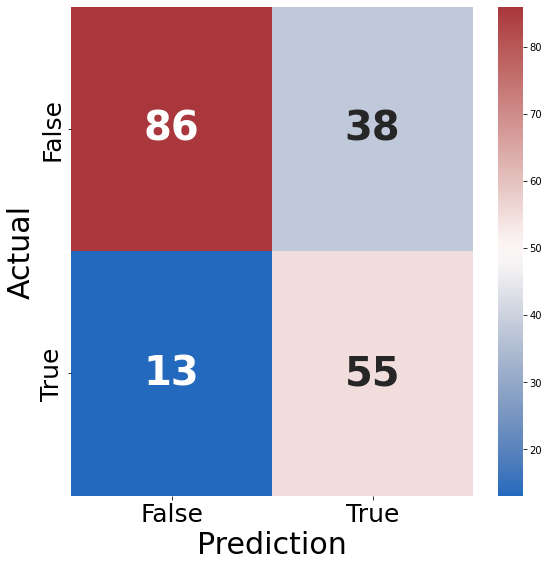

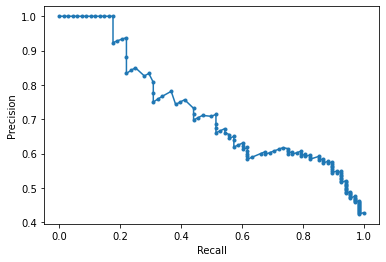

In [110]:
summary_of_model(grid_clf_boost_cat2, Xcat2_train, Xcat2_test, ycat2_train, ycat2_test, thresh) 

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       124
           1       0.63      0.59      0.61        68

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192

Recall of diabetes on the training set: 0.61
Accuracy on the training set: 0.81
Recall of diabetes class on the test set: 0.59
Accuracy on the test set: 0.73
[[101  23]
 [ 28  40]]


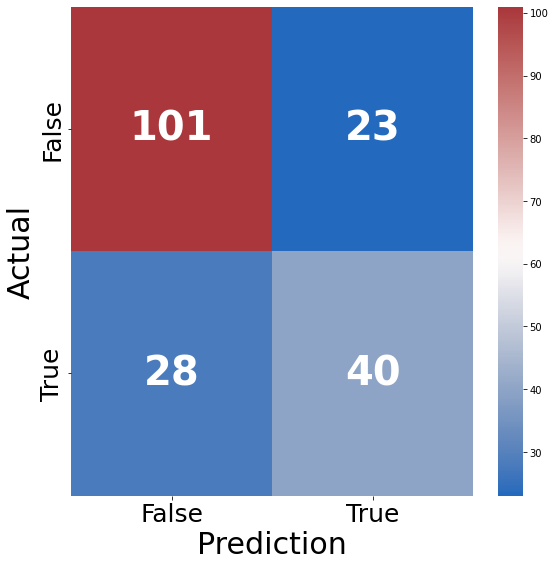

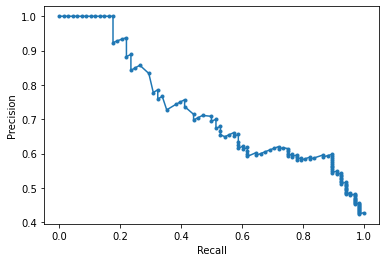

In [77]:
summary_of_model(grid_clf_boost_cat2, Xcat2_train, Xcat2_test, ycat2_train, ycat2_test, .5) #Summary using a threshold of .5

### Random Forest Classifier, One-hot Encoding on the Age and BMI

In [78]:
from sklearn.ensemble import RandomForestClassifier
clf_forest_cat2 = RandomForestClassifier()
grid_clf_forest_cat2 = GridSearchCV(clf_forest_cat2, forest_param_grid, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS)
# note: using previous parameter search parameters
grid_clf_forest_cat2.fit(Xcat2_train, ycat2_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': array([50])},
             scoring='f1')

In [79]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_forest_cat2.best_params_, grid_clf_forest_cat2.best_score_))

Best Params: {'max_depth': 4, 'max_features': None, 'n_estimators': 50}, 
 Best score: 0.6163935479620243


In [80]:
thresh = find_threshold(grid_clf_forest_cat2, ycat2_test, Xcat2_test)
print(thresh)

0.34999999999999987


              precision    recall  f1-score   support

           0       0.87      0.71      0.78       124
           1       0.60      0.81      0.69        68

    accuracy                           0.74       192
   macro avg       0.74      0.76      0.74       192
weighted avg       0.78      0.74      0.75       192

Recall of diabetes on the training set: 0.84
Accuracy on the training set: 0.84
Recall of diabetes class on the test set: 0.81
Accuracy on the test set: 0.74
[[88 36]
 [13 55]]


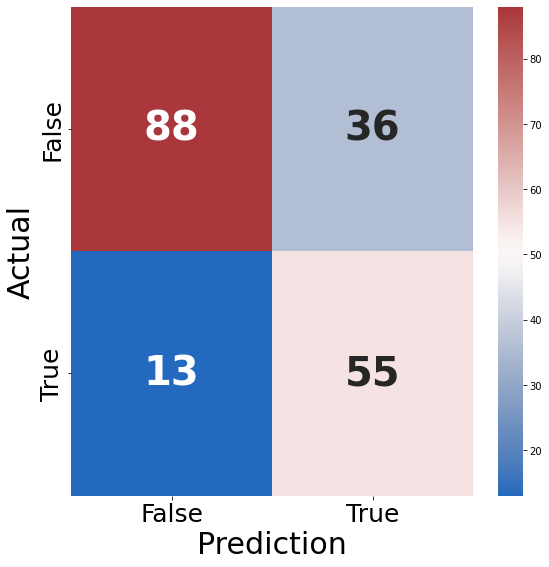

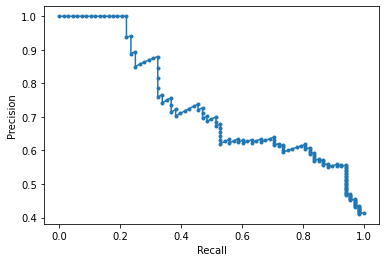

In [81]:
summary_of_model(grid_clf_forest_cat2, Xcat2_train, Xcat2_test, ycat2_train, ycat2_test, thresh)

## Tests One-hot encoding on the age

### Feature Setup, Scale Data, One-Hot Encode just the BMI

In [111]:
df_cat = df
df['bmi_cat'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, float('Inf')], labels=['healthy', 'overweight', 'obese', 'very_obese'])
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,age_cat,bmi_cat
0,6,148,72,35,125,33.6,0.627,50,1,mid,very_obese
1,1,85,66,29,125,26.6,0.351,31,0,young,obese
2,8,183,64,29,125,23.3,0.672,32,1,young,overweight
3,1,89,66,23,94,28.1,0.167,21,0,very young,obese
4,0,137,40,35,168,43.1,2.288,33,1,young,very_obese


In [112]:
cols_num = ['pregnancies', 'glucose', 'bloodpressure', 'insulin', 'diabetespedigreefunction', 'age'] #not including skin thickness, bmi (since bmi now categorical)
df_num = df[cols_num]
cols_cat = ['bmi_cat', 'outcome']
df_cat = df[cols_cat]

In [113]:
ss = StandardScaler()
#pd.pivot_table(df, index=['outcome'],  values = df.columns, aggfunc = np.mean)
df_num_scaled = pd.DataFrame(ss.fit_transform(df_num), index=df_num.index, columns=df_num.columns)
df_num_scaled.head()

,pregnancies,glucose,bloodpressure,insulin,diabetespedigreefunction,age
0,0.639947,0.866045,-0.031990,-0.181541,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.181541,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.181541,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.540642,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.316566,5.484909,-0.020496


In [114]:
ycat3 = df_cat.pop('outcome')
df_cat_encoded = pd.get_dummies(df_cat)
df_cat_encoded.head()

,bmi_cat_healthy,bmi_cat_overweight,bmi_cat_obese,bmi_cat_very_obese
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1


In [115]:
df_rejoined = pd.concat([df_num_scaled, df_cat_encoded], axis=1)
df_rejoined.head()

,pregnancies,glucose,bloodpressure,insulin,diabetespedigreefunction,age,bmi_cat_healthy,bmi_cat_overweight,bmi_cat_obese,bmi_cat_very_obese
0,0.639947,0.866045,-0.031990,-0.181541,0.468492,1.425995,0,0,0,1
1,-0.844885,-1.205066,-0.528319,-0.181541,-0.365061,-0.190672,0,0,1,0
2,1.233880,2.016662,-0.693761,-0.181541,0.604397,-0.105584,0,1,0,0
3,-0.844885,-1.073567,-0.528319,-0.540642,-0.920763,-1.041549,0,0,1,0
4,-1.141852,0.504422,-2.679076,0.316566,5.484909,-0.020496,0,0,0,1


In [116]:
Xcat3_train, Xcat3_test, ycat3_train, ycat3_test = train_test_split(df_rejoined, ycat3, test_size=TEST_FRACTION, random_state = RAND_STATE)

### Gradient Boosted Classifier with One-Hot Encoding just on BMI

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
clf_boost_cat3 = GradientBoostingClassifier()
grid_clf_boost_cat3 = GridSearchCV(clf_boost_cat3, param_grid=grid_values_boost, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS, verbose=2)
# note: using previous parameter search parameters
grid_clf_boost_cat3.fit(Xcat3_train, ycat3_train)

Fitting 7 folds for each of 108 candidates, totalling 756 fits


GridSearchCV(cv=7, estimator=GradientBoostingClassifier(), n_jobs=5,
             param_grid={'learning_rate': [0.005, 0.006, 0.007, 0.008, 0.009,
                                           0.01],
                         'max_depth': [2, 3],
                         'n_estimators': [500, 525, 550, 575, 600, 625, 650,
                                          675, 700]},
             scoring='f1', verbose=2)

In [119]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_boost_cat3.best_params_, grid_clf_boost_cat3.best_score_))

Best Params: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 600}, 
 Best score: 0.633353847927867


In [120]:
thresh = find_threshold(grid_clf_boost_cat3, ycat3_test, Xcat3_test)
print(thresh)

0.3799999999999999


              precision    recall  f1-score   support

           0       0.85      0.73      0.78       124
           1       0.60      0.76      0.68        68

    accuracy                           0.74       192
   macro avg       0.73      0.75      0.73       192
weighted avg       0.76      0.74      0.74       192

Recall of diabetes on the training set: 0.78
Accuracy on the training set: 0.81
Recall of diabetes class on the test set: 0.76
Accuracy on the test set: 0.74
[[90 34]
 [16 52]]


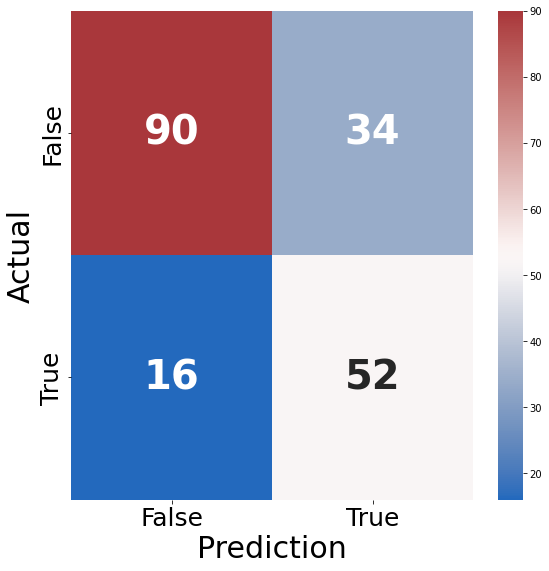

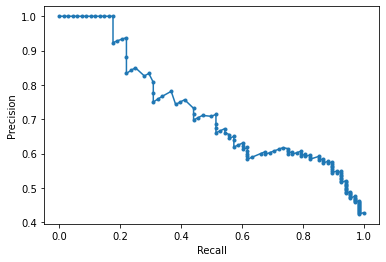

In [121]:
summary_of_model(grid_clf_boost_cat2, Xcat2_train, Xcat2_test, ycat2_train, ycat2_test, thresh)